### 시계열 데이터
- 시간의 흐름에 따라 변화되는 데이터
- 데이터의 패턴을 분석하여 향후 몇 일간의 값을 예측할 수 있다.

In [23]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 시간 관리를 위한 라이브러리
import datetime

# 데이터 수집
from pandas_datareader import data
import requests
from bs4 import BeautifulSoup
import re
import time
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select

# 화면 청소
from IPython.display import clear_output

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 차원 축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 시계열 분석
from pmdarima.arima import auto_arima
from fbprophet import Prophet

# 형태소 분석도구
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2
from soynlp.noun import LRNounExtractor
from soynlp.noun import NewsNounExtractor

# 워드 클라우드
from collections import Counter
import pytagcloud
from IPython.display import Image

# 상관관계
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 시간 정보가 포함된 데이터 살펴보기(시계열 데이터)

In [2]:
# 수집처 : blockchain.com
bitcoin_df = pd.read_csv('data/market-price.csv')
bitcoin_df

,datetime,market-price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000
...,...,...
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231


In [3]:
# 컬럼이름 변경
bitcoin_df.columns = ['day', 'price']
bitcoin_df

,day,price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000
...,...,...
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231


In [4]:
# 시간값은 datetime 타입이여야 한다.
# 확인
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [5]:
# day컬럼의 값을 날짜 타입으로 변경한다.
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     365 non-null    datetime64[ns]
 1   price   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [6]:
# 시각화를 위해 날짜를 인덱스로 설정한다.
bitcoin_df.set_index('day', inplace=True)
bitcoin_df

,price
day,
2017-08-27,4354.308333
2017-08-28,4391.673517
2017-08-29,4607.985450
2017-08-30,4594.987850
2017-08-31,4748.255000
...,...
2018-08-22,6575.229167
2018-08-23,6434.881667
2018-08-24,6543.645714


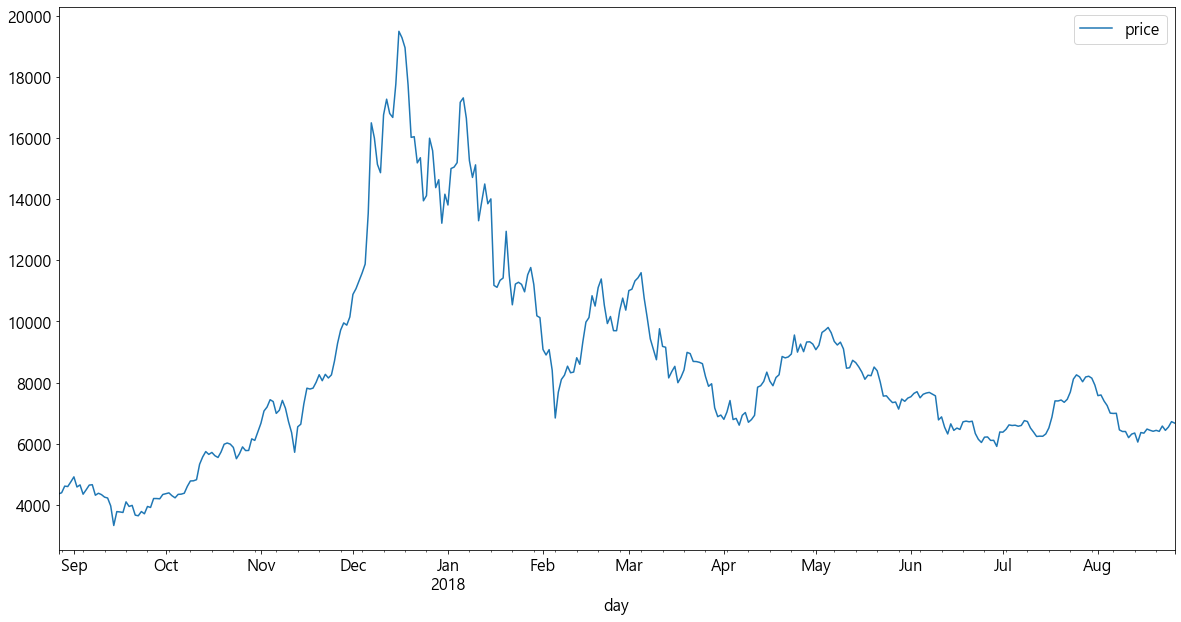

In [7]:
# 그래프로 그린다.
bitcoin_df.plot()
plt.show()

### ARIMA 모델 사용하기
- 시계열 데이터 분석 및 예측을 하기위해 사용하는 모델
- 모델의 order 를 설정하여 최적의 ARIMA 모델 구조를 생성해야한다.

In [10]:
model1 = auto_arima(bitcoin_df)
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2789.887
Date:                Fri, 04 Mar 2022   AIC                           5581.775
Time:                        15:22:38   BIC                           5585.672
Sample:                             0   HQIC                          5583.324
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.652e+05   8989.834     29.506      0.000    2.48e+05    2.83e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.67   Jarque-Bera (JB):               856.48
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
# 예측한다.
# 학습한 날자 이후 5일간의 데이터를 예측한다.
predict = model1.predict(n_periods=5)
predict

array([6673.27416667, 6673.27416667, 6673.27416667, 6673.27416667,
       6673.27416667])

In [13]:
# 5일 이후 데이터를 불러온다.
bitcoin_test_df = pd.read_csv('data/market-price-test.csv')
bitcoin_test_df.columns=['day', 'price']
bitcoin_test_df

,day,price
0,2018-08-27 00:00:00,6719.266154
1,2018-08-28 00:00:00,7000.040000
2,2018-08-29 00:00:00,7054.276429
3,2018-08-30 00:00:00,6932.662500
4,2018-08-31 00:00:00,6981.946154


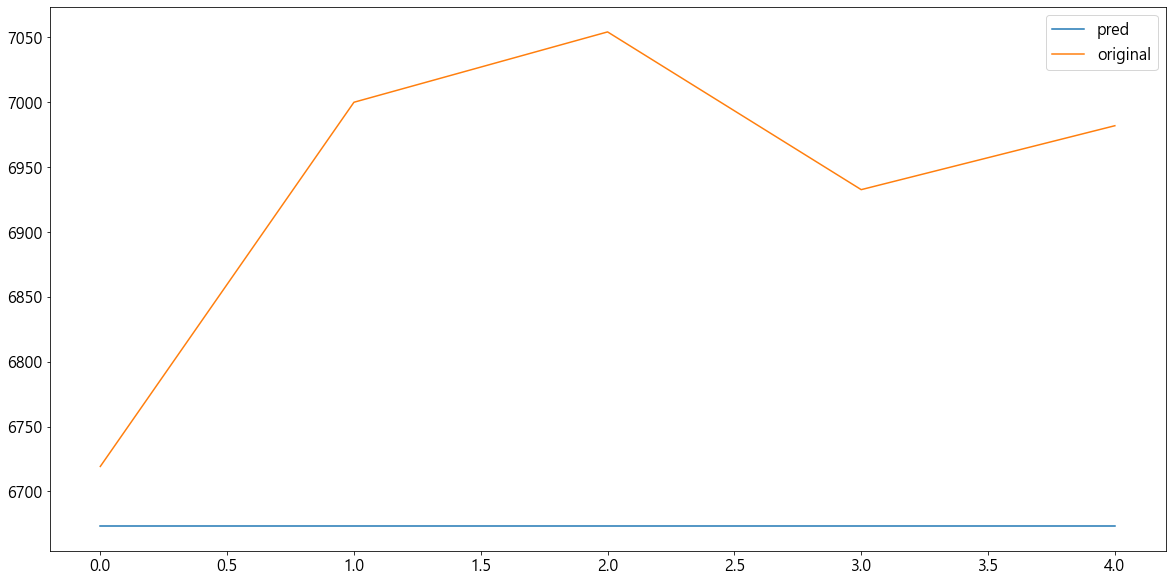

In [17]:
# 시각화
plt.plot(predict, label='pred')
plt.plot(bitcoin_test_df['price'].values, label='original')
plt.legend()
plt.show()

### facebook prophet
- facebook에서 주식 시세를 예측하기 위해 만든 모델

In [24]:
bitcoin_df = pd.read_csv('data/market-price.csv')
# fbprophet은 날짜 값은 ds, 값은 y라는 컬럼명이여한다.
bitcoin_df.columns = ['ds', 'y']
bitcoin_df

,ds,y
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000
...,...,...
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231


In [27]:
# fbprophet 생성 및 학습
# seasonality_mode : multiplicative를 넣어주면 다양한 기준을 통해 분석을 한다.
# yearly_seasonality, weekly_seasonality, daily_seasonality 를 True로 주면
# 년간, 주간, 일간 트랜드를 분석하여 패턴을 학습한다.
# chagepoint_prior_scale : 각 트랜드 기간 내에서 세밀화하는 기준
prophet = Prophet(seasonality_mode='multiplicative',
                 yearly_seasonality=True,
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

prophet.fit(bitcoin_df)

### 모델로 부터 예측 기간을 정의하고 결과를 도출한다.

In [28]:
# 5일을 내다보며 예측한다.
# periods : 내다볼 기간의 수
# freq : 기준 (d : 일, m : 월, y : 년)
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2017-08-27,513.967267,3702.763490,5108.018562,513.967267,513.967267,8.968437,8.968437,8.968437,7.615785,...,-0.038535,-0.038535,-0.038535,-1.314117,-1.314117,-1.314117,0.0,0.0,0.0,4428.231455
1,2017-08-28,518.029929,3802.000845,5114.288384,518.029929,518.029929,8.968437,8.968437,8.968437,7.686379,...,-0.006461,-0.006461,-0.006461,-1.275597,-1.275597,-1.275597,0.0,0.0,0.0,4499.804250
2,2017-08-29,522.092590,3854.239473,5205.534789,522.092590,522.092590,8.968437,8.968437,8.968437,7.733062,...,0.017381,0.017381,0.017381,-1.252756,-1.252756,-1.252756,0.0,0.0,0.0,4559.466968
3,2017-08-30,526.155252,3895.285126,5242.109160,526.155252,526.155252,8.968437,8.968437,8.968437,7.677521,...,-0.042695,-0.042695,-0.042695,-1.248222,-1.248222,-1.248222,0.0,0.0,0.0,4565.723109
4,2017-08-31,530.217914,3981.163315,5302.787894,530.217914,530.217914,8.968437,8.968437,8.968437,7.691150,...,-0.013228,-0.013228,-0.013228,-1.264059,-1.264059,-1.264059,0.0,0.0,0.0,4608.203400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2018-08-27,798.936686,6215.625014,7563.755631,798.936686,798.936686,8.968437,8.968437,8.968437,7.636134,...,-0.006461,-0.006461,-0.006461,-1.325842,-1.325842,-1.325842,0.0,0.0,0.0,6899.724550
366,2018-08-28,803.275432,6292.920959,7614.502991,803.275432,803.275432,8.968437,8.968437,8.968437,7.701947,...,0.017381,0.017381,0.017381,-1.283871,-1.283871,-1.283871,0.0,0.0,0.0,6990.060163
367,2018-08-29,807.614178,6279.636858,7731.842837,807.614178,808.667018,8.968437,8.968437,8.968437,7.668899,...,-0.042695,-0.042695,-0.042695,-1.256844,-1.256844,-1.256844,0.0,0.0,0.0,7001.125569
368,2018-08-30,811.952923,6303.510075,7812.264102,806.269356,819.563794,8.968437,8.968437,8.968437,7.707693,...,-0.013228,-0.013228,-0.013228,-1.247516,-1.247516,-1.247516,0.0,0.0,0.0,7070.236574


In [29]:
# 예측결과를 추출한다.
forecast_data[['ds', 'yhat']]

,ds,yhat
0,2017-08-27,4428.231455
1,2017-08-28,4499.804250
2,2017-08-29,4559.466968
3,2017-08-30,4565.723109
4,2017-08-31,4608.203400
...,...,...
365,2018-08-27,6899.724550
366,2018-08-28,6990.060163
367,2018-08-29,7001.125569
368,2018-08-30,7070.236574


In [30]:
# 시각화
bitcoin_test_df

,day,price
0,2018-08-27 00:00:00,6719.266154
1,2018-08-28 00:00:00,7000.040000
2,2018-08-29 00:00:00,7054.276429
3,2018-08-30 00:00:00,6932.662500
4,2018-08-31 00:00:00,6981.946154


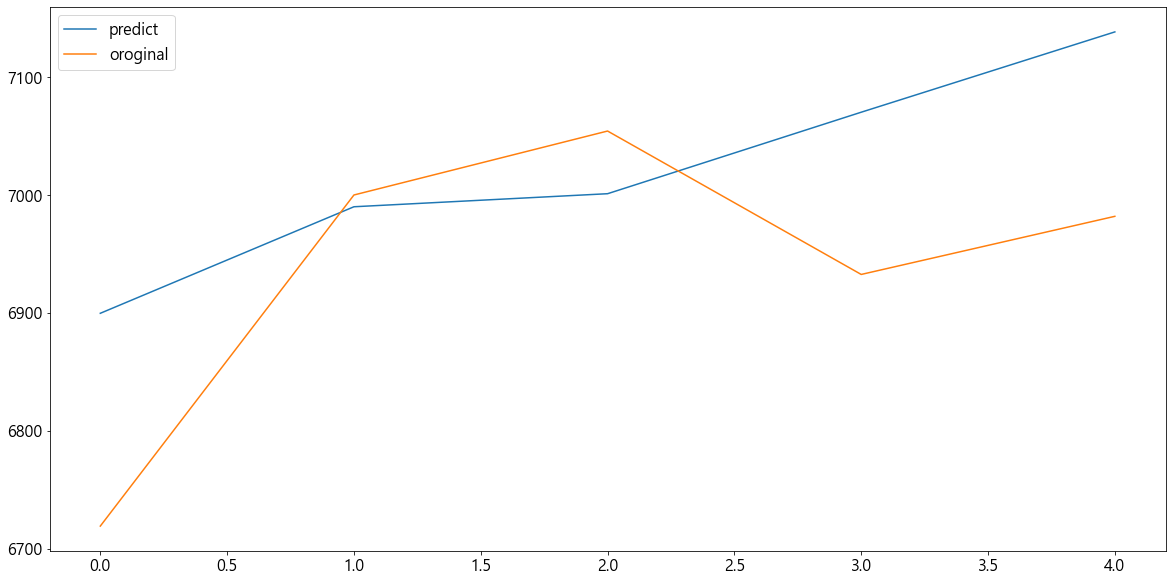

In [35]:
plt.plot(forecast_data['yhat'].values[-5:], label='predict')
plt.plot(bitcoin_test_df['price'].values, label='oroginal')
plt.legend()
plt.show()